# Introduction to pandas:
[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API.
It's a great tool for handling and analyzing input data, and many ML frameworks
support *pandas* data structures as inputs.  

Although a comprehensive
introduction to the API would span many pages, the core concepts are fairly
straightforward, and we'll present them below. For a more complete reference,
the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html)
contains extensive documentation and many tutorials. (Note that Colab may use a
slightly older version number, but the parts of *pandas* covered here are
unlikely to differ from version to version.)

In [1]:
import pandas as pd
pd.__version__

'2.2.2'

# Series and DataFrame:
The primary data structures in *pandas* are implemented as two classes:
* **`Series`**, which is a single column. Each row can be labeled via an index. A DataFrame contains one or more Series and a name for each Series.
* **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in Spark and R.

### Series:
think of series as,
* A single column of data
* Like a list, but with superpowers:
    * It has values
    * It has labels (called an index)

In [2]:
cities = pd.Series(["chennai", "mumbai", "kolkata", "delhi"])
cities


,0
0,chennai
1,mumbai
2,kolkata
3,delhi


In [3]:
type(cities)

pandas.core.series.Series

we can label them ourselves

In [4]:
cities = pd.Series({"south":"Chennai", "west":"Mumbai", "east":"Kolkata", "north":"New Delhi"})

cities

,0
south,Chennai
west,Mumbai
east,Kolkata
north,New Delhi


### DataFrame:
* `DataFrame` is a stack of a bunch of `Series` side by side each with a column name.
* its rows have indices
* Columns have names and are actually `Series` under the hood



In [5]:
cities = pd.Series(["chennai", "mumbai", "kolkata", "delhi"])
population = pd.Series([700000, 1700000, 800000])

city_info_df = pd.DataFrame({"cities": cities, "population": population})
city_info_df

,cities,population
0,chennai,700000.0
1,mumbai,1700000.0
2,kolkata,800000.0
3,delhi,NaN


In [6]:
type(city_info_df)

pandas.core.frame.DataFrame

# Exploring data in DataFrame:

In [7]:
from sklearn.datasets import load_diabetes


?load_diabetes

In [8]:
diabetes = load_diabetes(as_frame=True)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

* It gives you a **Bunch** object (a fancy dictionary), which contains several fields like this
```python
dict_keys([
    'data',            # numpy array of shape (442, 10): feature data
    'target',          # numpy array of shape (442,): continuous target values
    'frame',           # pandas DataFrame, optional (available if return_X_y=False and as_frame=True)
    'feature_names',   # list of 10 feature names
    'DESCR',           # long string description of the dataset
    'data_filename',   # path to .csv file with data (for legacy purposes)
    'target_filename'  # path to .csv file with target values (for legacy purposes)
])

```

In [9]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [10]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [11]:
diabetes.data[:5]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [12]:
df = diabetes["data"]
df.shape

(442, 10)

442 rows and 10 columns

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

It gives pandas index type which is like a list but not python basic list. But it can be transformed to python list

In [14]:
list(df.columns)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [15]:
df.info

<bound method DataFrame.info of           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1   -0.039493 -0.068332 -0.092204  
2   -0.002592  0.002861 -0.025930  
3    0.034309  0.022688 -0.009362  
4   -0.002592 -0.031988 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018114  0.044485  
439 -0.011080 -0.046883  0.015491  
440  0.026560  0.044529 -0.025930  
441 -0.039493 -0.004222  0.003064  

[442 rows x 10 columns]>

In [16]:
# first five entries
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [17]:
# Last ten entries
df.tail(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
432,0.009016,-0.044642,0.055229,-0.005670,0.057597,0.044719,-0.002903,0.023239,0.055686,0.106617
433,-0.027310,-0.044642,-0.060097,-0.029770,0.046589,0.019980,0.122273,-0.039493,-0.051404,-0.009362
434,0.016281,-0.044642,0.001339,0.008101,0.005311,0.010899,0.030232,-0.039493,-0.045424,0.032059
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357
436,-0.056370,-0.044642,-0.074108,-0.050427,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064


In [18]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [19]:
df.describe().T # to transpose

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [20]:
df.describe(percentiles=[0.2, 0.4, 0.6])

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
20%,-4.547248e-02,-4.464164e-02,-4.048038e-02,-4.009893e-02,-3.871969e-02,-3.695017e-02,-3.971921e-02,-3.949338e-02,-4.117617e-02,-3.835666e-02
40%,-5.514555e-03,-4.464164e-02,-1.806189e-02,-1.944183e-02,-1.202620e-02,-1.559345e-02,-1.762938e-02,-7.684617e-03,-1.811369e-02,-1.184718e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
60%,1.628068e-02,5.068012e-02,5.218854e-03,8.100982e-03,8.062710e-03,8.706873e-03,8.142084e-03,-2.592262e-03,1.255119e-02,7.206516e-03
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


# Selection:

In [21]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [22]:
df["age"]

,age
0,0.038076
1,-0.001882
2,0.085299
3,-0.089063
4,0.005383
...,...
437,0.041708
438,-0.005515
439,0.041708
440,-0.045472


In [23]:
type(df["age"])

pandas.core.series.Series

In [24]:
df["age"][:5]

,age
0,0.038076
1,-0.001882
2,0.085299
3,-0.089063
4,0.005383


In [25]:
df["age"][100:200]

,age
100,0.016281
101,0.016281
102,-0.092695
103,0.059871
104,-0.027310
...,...
195,0.027178
196,-0.023677
197,0.048974
198,-0.052738


In [26]:
df[["age", "sex"]]

,age,sex
0,0.038076,0.050680
1,-0.001882,-0.044642
2,0.085299,0.050680
3,-0.089063,-0.044642
4,0.005383,-0.044642
...,...,...
437,0.041708,0.050680
438,-0.005515,0.050680
439,0.041708,0.050680
440,-0.045472,-0.044642


In [27]:
type(df[["age", "sex"]])

pandas.core.frame.DataFrame

In [28]:
df[["age", "sex"]][:5]

,age,sex
0,0.038076,0.050680
1,-0.001882,-0.044642
2,0.085299,0.050680
3,-0.089063,-0.044642
4,0.005383,-0.044642


In [29]:
df[["age", "sex"]][10:20]

,age,sex
10,-0.096328,-0.044642
11,0.027178,0.050680
12,0.016281,-0.044642
13,0.005383,0.050680
14,0.045341,-0.044642
15,-0.052738,0.050680
16,-0.005515,-0.044642
17,0.070769,0.050680
18,-0.038207,-0.044642
19,-0.027310,-0.044642


`iloc`
* Integer Location based indexing
* takes row and column indices
* use integers only


In [30]:
df.iloc[0] # returns first row

,0
age,0.038076
sex,0.050680
bmi,0.061696
bp,0.021872
s1,-0.044223
s2,-0.034821
s3,-0.043401
s4,-0.002592
s5,0.019907
s6,-0.017646


In [31]:
df.iloc[2, 4] # 3rd row 5th column

np.float64(-0.04559945128264711)

In [32]:
df.iloc[1:6] # 2nd row to 6th row

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346


In [33]:
df.iloc[:, 1] # all rows first column

,sex
0,0.050680
1,-0.044642
2,0.050680
3,-0.044642
4,-0.044642
...,...
437,0.050680
438,0.050680
439,0.050680
440,-0.044642


In [34]:
df.iloc[5, [1, 3, 5, 7]] # 5th row and 1, 3, 5, 7th columns

,5
sex,-0.044642
bp,-0.019442
s2,-0.079288
s4,-0.076395


`loc`
* label based indexing
* takes actual names of the columns



In [35]:
df.loc[0] # row with label 0 (the first row)

,0
age,0.038076
sex,0.050680
bmi,0.061696
bp,0.021872
s1,-0.044223
s2,-0.034821
s3,-0.043401
s4,-0.002592
s5,0.019907
s6,-0.017646


In [36]:
df.loc[5, "age"] # 4th row column named age

np.float64(-0.09269547780327612)

In [37]:
df.loc[6:10,"sex"] # 6th to 10th row and sex column

,sex
6,0.050680
7,0.050680
8,0.050680
9,-0.044642
10,-0.044642


unlike `iloc`, `loc` slicing is inclusive on both ends.

In [38]:
df.loc[5,["age", "sex"]] # 4th row, age and sex column

,5
age,-0.092695
sex,-0.044642


In [39]:
row_condition_met = df.age > 5.383060e-03

In [40]:
df[row_condition_met]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
...,...,...,...,...,...,...,...,...,...,...
431,0.070769,0.050680,-0.030996,0.021872,-0.037344,-0.047034,0.033914,-0.039493,-0.014960,-0.001078
432,0.009016,-0.044642,0.055229,-0.005670,0.057597,0.044719,-0.002903,0.023239,0.055686,0.106617
434,0.016281,-0.044642,0.001339,0.008101,0.005311,0.010899,0.030232,-0.039493,-0.045424,0.032059
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207


In [41]:
df.loc[df["age"] > 5.383060e-03]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
...,...,...,...,...,...,...,...,...,...,...
431,0.070769,0.050680,-0.030996,0.021872,-0.037344,-0.047034,0.033914,-0.039493,-0.014960,-0.001078
432,0.009016,-0.044642,0.055229,-0.005670,0.057597,0.044719,-0.002903,0.023239,0.055686,0.106617
434,0.016281,-0.044642,0.001339,0.008101,0.005311,0.010899,0.030232,-0.039493,-0.045424,0.032059
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207


In [42]:
age_df_temp = df.loc[df["age"] < 5.383060e-03]
age_df_temp

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504
...,...,...,...,...,...,...,...,...,...,...
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357
436,-0.056370,-0.044642,-0.074108,-0.050427,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [43]:
age_df_temp = df[df["age"] < 5.383060e-03]
age_df_temp

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504
...,...,...,...,...,...,...,...,...,...,...
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357
436,-0.056370,-0.044642,-0.074108,-0.050427,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [44]:
age_df_temp.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


In [45]:
age_df_temp.iloc[1] # 2nd row

,3
age,-0.089063
sex,-0.044642
bmi,-0.011595
bp,-0.036656
s1,0.012191
s2,0.024991
s3,-0.036038
s4,0.034309
s5,0.022688
s6,-0.009362


In [46]:
age_df_temp.loc[1] # row with label 1



,1
age,-0.001882
sex,-0.044642
bmi,-0.051474
bp,-0.026328
s1,-0.008449
s2,-0.019163
s3,0.074412
s4,-0.039493
s5,-0.068332
s6,-0.092204


age_df_temp.loc[0] will return key error since row with label 0 is not in age_df_temp

In [47]:
age_df_temp = df.loc[(df.age < 5.383060e-03) & (df.sex > -4.464164e-02 )]
age_df_temp.shape

(214, 10)

In [48]:
age_df_temp

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504
...,...,...,...,...,...,...,...,...,...,...
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357
436,-0.056370,-0.044642,-0.074108,-0.050427,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [49]:
list("ABCD")

['A', 'B', 'C', 'D']

In [50]:
list("abcdefghi")

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

In [51]:
range(100)

range(0, 100)

In [52]:
import numpy as np

In [53]:
another_df = pd.DataFrame(
    np.random.rand(100, 4),
    index=range(10, 110),
    columns=list("ABCD"))

* `np.random.rand(100, 4)` generates a $100 * 4$ NumPy array full of random floats between $0$ and $1$.
* `range(10, 110)` sets row indices from 10 to 109.
* `list("ABCD")` sets columns as $A, B, C, D$

In [54]:
another_df.head()

,A,B,C,D
10,0.587435,0.074855,0.431882,0.606630
11,0.651545,0.144653,0.649395,0.918342
12,0.362825,0.181507,0.332709,0.141388
13,0.414435,0.545320,0.860775,0.880503
14,0.632107,0.996461,0.491678,0.524673


In [55]:
another_df.tail()

,A,B,C,D
105,0.733259,0.947516,0.100996,0.908513
106,0.970125,0.542470,0.957830,0.600954
107,0.782939,0.860232,0.963233,0.596660
108,0.950522,0.460580,0.548362,0.918153
109,0.842569,0.179905,0.271533,0.047214


In [56]:
df = pd.DataFrame(
    np.random.rand(9, 4),
    index=list("abcdefghi"),
    columns=list("ABCD"))
# we are changing the df to be a random 9 X 4 numpy array with row indices as abcdefghi and columns as ABCD

df.shape

(9, 4)

In [57]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [58]:
df.info

<bound method DataFrame.info of           A         B         C         D
a  0.931836  0.558066  0.188527  0.172746
b  0.534107  0.715566  0.201028  0.265367
c  0.671116  0.598026  0.312381  0.356650
d  0.754741  0.145495  0.407333  0.773105
e  0.581236  0.440400  0.770446  0.231279
f  0.701220  0.023648  0.329601  0.163667
g  0.583465  0.268248  0.242717  0.938403
h  0.350246  0.515280  0.437911  0.803912
i  0.820759  0.331662  0.328608  0.687201>

In [59]:
df.head()

,A,B,C,D
a,0.931836,0.558066,0.188527,0.172746
b,0.534107,0.715566,0.201028,0.265367
c,0.671116,0.598026,0.312381,0.356650
d,0.754741,0.145495,0.407333,0.773105
e,0.581236,0.440400,0.770446,0.231279


In [60]:
df.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'], dtype='object')

In [61]:
df.loc["a"]

,a
A,0.931836
B,0.558066
C,0.188527
D,0.172746


In [62]:
df.loc["a", "A":"D"] # remember loc is inclusive on both ends

,a
A,0.931836
B,0.558066
C,0.188527
D,0.172746


In [63]:
df.loc["a", ["A", "C"]]

,a
A,0.931836
C,0.188527


In [64]:
df.loc["a":"d", :]

,A,B,C,D
a,0.931836,0.558066,0.188527,0.172746
b,0.534107,0.715566,0.201028,0.265367
c,0.671116,0.598026,0.312381,0.356650
d,0.754741,0.145495,0.407333,0.773105


In [65]:
df.iloc[8]

,i
A,0.820759
B,0.331662
C,0.328608
D,0.687201


In [66]:
df.iloc[:4, 0:3] # iloc slicing is exclusive on right side

,A,B,C
a,0.931836,0.558066,0.188527
b,0.534107,0.715566,0.201028
c,0.671116,0.598026,0.312381
d,0.754741,0.145495,0.407333


In [67]:
df.iloc[:4, 1:3]

,B,C
a,0.558066,0.188527
b,0.715566,0.201028
c,0.598026,0.312381
d,0.145495,0.407333


In [68]:
df.iloc[:4]

,A,B,C,D
a,0.931836,0.558066,0.188527,0.172746
b,0.534107,0.715566,0.201028,0.265367
c,0.671116,0.598026,0.312381,0.356650
d,0.754741,0.145495,0.407333,0.773105


In [69]:
df.iloc[:, 1]

,B
a,0.558066
b,0.715566
c,0.598026
d,0.145495
e,0.440400
f,0.023648
g,0.268248
h,0.515280
i,0.331662


In [70]:
selector = lambda df: df["A"] > 0.5
selector

<function __main__.<lambda>(df)>

In [71]:
df.loc[selector]

,A,B,C,D
a,0.931836,0.558066,0.188527,0.172746
b,0.534107,0.715566,0.201028,0.265367
c,0.671116,0.598026,0.312381,0.356650
d,0.754741,0.145495,0.407333,0.773105
e,0.581236,0.440400,0.770446,0.231279
f,0.701220,0.023648,0.329601,0.163667
g,0.583465,0.268248,0.242717,0.938403
i,0.820759,0.331662,0.328608,0.687201


In [72]:
df.loc[df["A"]>0.5]

,A,B,C,D
a,0.931836,0.558066,0.188527,0.172746
b,0.534107,0.715566,0.201028,0.265367
c,0.671116,0.598026,0.312381,0.356650
d,0.754741,0.145495,0.407333,0.773105
e,0.581236,0.440400,0.770446,0.231279
f,0.701220,0.023648,0.329601,0.163667
g,0.583465,0.268248,0.242717,0.938403
i,0.820759,0.331662,0.328608,0.687201


In [73]:
selector = lambda df: (df["A"]>0.5) & (df["B"] < 0.2) # returns elements where both conditions are met equivalent to python "and"

df.loc[selector]

,A,B,C,D
d,0.754741,0.145495,0.407333,0.773105
f,0.701220,0.023648,0.329601,0.163667


In [74]:
df.loc[(df["A"]>0.5) & (df["B"]<0.2)]

,A,B,C,D
d,0.754741,0.145495,0.407333,0.773105
f,0.701220,0.023648,0.329601,0.163667


`df.loc[df["A"] > 0.2]` returns the array while `df["A"] > 0.2` returns boolean values

In [75]:
condition_for_selection = (df["A"] > 0.5) & (df["B"] < 0.2)
condition_for_selection

,0
a,False
b,False
c,False
d,True
e,False
f,True
g,False
h,False
i,False


In [76]:
condition_for_selection = (df["A"] > 0.5) | ~(df["B"] < 0.8)
# | is equivalent for python "or"
# ~ is equivalent for python "not"

condition_for_selection

,0
a,True
b,True
c,True
d,True
e,True
f,True
g,True
h,False
i,True


In [77]:
df.loc[condition_for_selection]


,A,B,C,D
a,0.931836,0.558066,0.188527,0.172746
b,0.534107,0.715566,0.201028,0.265367
c,0.671116,0.598026,0.312381,0.356650
d,0.754741,0.145495,0.407333,0.773105
e,0.581236,0.440400,0.770446,0.231279
f,0.701220,0.023648,0.329601,0.163667
g,0.583465,0.268248,0.242717,0.938403
i,0.820759,0.331662,0.328608,0.687201


# Adding a column to the DataFrame

In [78]:
df["E"] = df["A"] * 100
df

,A,B,C,D,E
a,0.931836,0.558066,0.188527,0.172746,93.183647
b,0.534107,0.715566,0.201028,0.265367,53.410691
c,0.671116,0.598026,0.312381,0.356650,67.111644
d,0.754741,0.145495,0.407333,0.773105,75.474139
e,0.581236,0.440400,0.770446,0.231279,58.123648
f,0.701220,0.023648,0.329601,0.163667,70.121973
g,0.583465,0.268248,0.242717,0.938403,58.346518
h,0.350246,0.515280,0.437911,0.803912,35.024564
i,0.820759,0.331662,0.328608,0.687201,82.075882


In [79]:
df["F"] = df["A"] + df["C"]
df

,A,B,C,D,E,F
a,0.931836,0.558066,0.188527,0.172746,93.183647,1.120364
b,0.534107,0.715566,0.201028,0.265367,53.410691,0.735135
c,0.671116,0.598026,0.312381,0.356650,67.111644,0.983497
d,0.754741,0.145495,0.407333,0.773105,75.474139,1.162074
e,0.581236,0.440400,0.770446,0.231279,58.123648,1.351683
f,0.701220,0.023648,0.329601,0.163667,70.121973,1.030820
g,0.583465,0.268248,0.242717,0.938403,58.346518,0.826182
h,0.350246,0.515280,0.437911,0.803912,35.024564,0.788157
i,0.820759,0.331662,0.328608,0.687201,82.075882,1.149366


In [80]:
criteria = df["A"] < 0.2
criteria

,A
a,False
b,False
c,False
d,False
e,False
f,False
g,False
h,False
i,False


In [81]:
df.loc[criteria, "A"] = 0 # selects the rows with criteria and column A then replaces their values with 0
df

,A,B,C,D,E,F
a,0.931836,0.558066,0.188527,0.172746,93.183647,1.120364
b,0.534107,0.715566,0.201028,0.265367,53.410691,0.735135
c,0.671116,0.598026,0.312381,0.356650,67.111644,0.983497
d,0.754741,0.145495,0.407333,0.773105,75.474139,1.162074
e,0.581236,0.440400,0.770446,0.231279,58.123648,1.351683
f,0.701220,0.023648,0.329601,0.163667,70.121973,1.030820
g,0.583465,0.268248,0.242717,0.938403,58.346518,0.826182
h,0.350246,0.515280,0.437911,0.803912,35.024564,0.788157
i,0.820759,0.331662,0.328608,0.687201,82.075882,1.149366


In [82]:
cities = ["Chennai", "Mumbai", "Delhi", "Kolkata", "Bengalure", "Hyderabad", "Pune", "Trichy", "Vizag"]
df["city"] = cities
df

,A,B,C,D,E,F,city
a,0.931836,0.558066,0.188527,0.172746,93.183647,1.120364,Chennai
b,0.534107,0.715566,0.201028,0.265367,53.410691,0.735135,Mumbai
c,0.671116,0.598026,0.312381,0.356650,67.111644,0.983497,Delhi
d,0.754741,0.145495,0.407333,0.773105,75.474139,1.162074,Kolkata
e,0.581236,0.440400,0.770446,0.231279,58.123648,1.351683,Bengalure
f,0.701220,0.023648,0.329601,0.163667,70.121973,1.030820,Hyderabad
g,0.583465,0.268248,0.242717,0.938403,58.346518,0.826182,Pune
h,0.350246,0.515280,0.437911,0.803912,35.024564,0.788157,Trichy
i,0.820759,0.331662,0.328608,0.687201,82.075882,1.149366,Vizag


In [83]:
df_copy = df.copy()
df_copy


,A,B,C,D,E,F,city
a,0.931836,0.558066,0.188527,0.172746,93.183647,1.120364,Chennai
b,0.534107,0.715566,0.201028,0.265367,53.410691,0.735135,Mumbai
c,0.671116,0.598026,0.312381,0.356650,67.111644,0.983497,Delhi
d,0.754741,0.145495,0.407333,0.773105,75.474139,1.162074,Kolkata
e,0.581236,0.440400,0.770446,0.231279,58.123648,1.351683,Bengalure
f,0.701220,0.023648,0.329601,0.163667,70.121973,1.030820,Hyderabad
g,0.583465,0.268248,0.242717,0.938403,58.346518,0.826182,Pune
h,0.350246,0.515280,0.437911,0.803912,35.024564,0.788157,Trichy
i,0.820759,0.331662,0.328608,0.687201,82.075882,1.149366,Vizag


In [84]:
new_cities = ["Chennai", "Mumbai", "Delhi", "Kolkata", "Bengalure", "Hyderabad", "Coimbatore", "Trichy", "Vizag"]
df_copy["new_city"] = new_cities
df_copy

,A,B,C,D,E,F,city,new_city
a,0.931836,0.558066,0.188527,0.172746,93.183647,1.120364,Chennai,Chennai
b,0.534107,0.715566,0.201028,0.265367,53.410691,0.735135,Mumbai,Mumbai
c,0.671116,0.598026,0.312381,0.356650,67.111644,0.983497,Delhi,Delhi
d,0.754741,0.145495,0.407333,0.773105,75.474139,1.162074,Kolkata,Kolkata
e,0.581236,0.440400,0.770446,0.231279,58.123648,1.351683,Bengalure,Bengalure
f,0.701220,0.023648,0.329601,0.163667,70.121973,1.030820,Hyderabad,Hyderabad
g,0.583465,0.268248,0.242717,0.938403,58.346518,0.826182,Pune,Coimbatore
h,0.350246,0.515280,0.437911,0.803912,35.024564,0.788157,Trichy,Trichy
i,0.820759,0.331662,0.328608,0.687201,82.075882,1.149366,Vizag,Vizag


In [85]:
criteria = df_copy["city"].isin(["Pune", "Hyderabad", "Bengaluru"]) # returns boolean values

In [86]:
df_copy.loc[df.city == "Bengalure",["city", "new_city"]] = "Bengaluru"
df_copy

,A,B,C,D,E,F,city,new_city
a,0.931836,0.558066,0.188527,0.172746,93.183647,1.120364,Chennai,Chennai
b,0.534107,0.715566,0.201028,0.265367,53.410691,0.735135,Mumbai,Mumbai
c,0.671116,0.598026,0.312381,0.356650,67.111644,0.983497,Delhi,Delhi
d,0.754741,0.145495,0.407333,0.773105,75.474139,1.162074,Kolkata,Kolkata
e,0.581236,0.440400,0.770446,0.231279,58.123648,1.351683,Bengaluru,Bengaluru
f,0.701220,0.023648,0.329601,0.163667,70.121973,1.030820,Hyderabad,Hyderabad
g,0.583465,0.268248,0.242717,0.938403,58.346518,0.826182,Pune,Coimbatore
h,0.350246,0.515280,0.437911,0.803912,35.024564,0.788157,Trichy,Trichy
i,0.820759,0.331662,0.328608,0.687201,82.075882,1.149366,Vizag,Vizag


In [87]:
# lets add a column and remove it with drop function
df_copy["drop_column"] = [1, 2, 3, 4, 5, 6, 7, 8, 9]
df_copy

,A,B,C,D,E,F,city,new_city,drop_column
a,0.931836,0.558066,0.188527,0.172746,93.183647,1.120364,Chennai,Chennai,1
b,0.534107,0.715566,0.201028,0.265367,53.410691,0.735135,Mumbai,Mumbai,2
c,0.671116,0.598026,0.312381,0.356650,67.111644,0.983497,Delhi,Delhi,3
d,0.754741,0.145495,0.407333,0.773105,75.474139,1.162074,Kolkata,Kolkata,4
e,0.581236,0.440400,0.770446,0.231279,58.123648,1.351683,Bengaluru,Bengaluru,5
f,0.701220,0.023648,0.329601,0.163667,70.121973,1.030820,Hyderabad,Hyderabad,6
g,0.583465,0.268248,0.242717,0.938403,58.346518,0.826182,Pune,Coimbatore,7
h,0.350246,0.515280,0.437911,0.803912,35.024564,0.788157,Trichy,Trichy,8
i,0.820759,0.331662,0.328608,0.687201,82.075882,1.149366,Vizag,Vizag,9


In [88]:
?df.drop

In [89]:
df_copy = df_copy.drop(["drop_column"], axis = 1) # axis = 1 to drop columns
df_copy

,A,B,C,D,E,F,city,new_city
a,0.931836,0.558066,0.188527,0.172746,93.183647,1.120364,Chennai,Chennai
b,0.534107,0.715566,0.201028,0.265367,53.410691,0.735135,Mumbai,Mumbai
c,0.671116,0.598026,0.312381,0.356650,67.111644,0.983497,Delhi,Delhi
d,0.754741,0.145495,0.407333,0.773105,75.474139,1.162074,Kolkata,Kolkata
e,0.581236,0.440400,0.770446,0.231279,58.123648,1.351683,Bengaluru,Bengaluru
f,0.701220,0.023648,0.329601,0.163667,70.121973,1.030820,Hyderabad,Hyderabad
g,0.583465,0.268248,0.242717,0.938403,58.346518,0.826182,Pune,Coimbatore
h,0.350246,0.515280,0.437911,0.803912,35.024564,0.788157,Trichy,Trichy
i,0.820759,0.331662,0.328608,0.687201,82.075882,1.149366,Vizag,Vizag


In [90]:
df_copy = df_copy.drop(["city"]) # this throws an erroe since axis = 0 as default which denotes rows and there is no row with label city

KeyError: "['city'] not found in axis"

In [ ]:
?df_copy.sample

In [ ]:
df_copy.sample(3) # returns 3 random samples from the dataset on every time the script is run

* setting a `random_state` gives the same random samples on every time the script is run
* It is like fixing the randomness to a constant so that it does the same thing everytime
* The number 42 can be any non negative integer from 0 to 2<sup>32</sup>.
* `random_state` is set to 42 commonly

In [ ]:
df_copy.sample(3, random_state = 42)

In [ ]:
df_copy.sample(3, replace=True) # allows multiple occurences of same row. Try running multiple times to see two rows occur at same time

# Statistics using pandas:

In [91]:
cities = ["Chennai", "Mumbai", "Kolkata", "Delhi", "Bengaluru", "Hyderabad", "Coimbatore", "Pune"]

cities_df = pd.DataFrame(cities)
cities_df

,0
0,Chennai
1,Mumbai
2,Kolkata
3,Delhi
4,Bengaluru
5,Hyderabad
6,Coimbatore
7,Pune


In [92]:
cities_df.columns = ["city_name"]
cities_df

,city_name
0,Chennai
1,Mumbai
2,Kolkata
3,Delhi
4,Bengaluru
5,Hyderabad
6,Coimbatore
7,Pune


In [93]:
condition = cities_df["city_name"] == "Chennai"

condition

,city_name
0,True
1,False
2,False
3,False
4,False
5,False
6,False
7,False


In [95]:
cities_df[condition]

,city_name
0,Chennai


In [96]:
cities_df.loc[condition]

,city_name
0,Chennai


In [97]:
cities_df[cities_df.city_name == "Delhi"]

,city_name
3,Delhi


Pandas [cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

# Aggregation and Grouping

In [103]:
random_state = np.random.RandomState(42)
random_series = pd.Series(random_state.rand(10))

In [104]:
random_series

,0
0,0.374540
1,0.950714
2,0.731994
3,0.598658
4,0.156019
5,0.155995
6,0.058084
7,0.866176
8,0.601115
9,0.708073


In [105]:
random_series.mean()

np.float64(0.5201367359526748)

In [106]:
random_series.std() # standard deviation

0.3158656227180549

In [107]:
random_series.sum()

np.float64(5.201367359526748)

In [108]:
random_series.median()

0.5998867479701226

In [109]:
df = pd.DataFrame({"A": random_state.rand(5),
                   "B": random_state.rand(5)})

df

,A,B
0,0.020584,0.183405
1,0.969910,0.304242
2,0.832443,0.524756
3,0.212339,0.431945
4,0.181825,0.291229


In [119]:
df.sum() # returns sum of elements in each row by default

,0
A,2.217101
B,1.735577


In [120]:
df.mean()

,0
A,0.443420
B,0.347115


In [121]:
df.mode()

,A,B
0,0.020584,0.183405
1,0.181825,0.291229
2,0.212339,0.304242
3,0.832443,0.431945
4,0.969910,0.524756


In [122]:
df.median()

,0
A,0.212339
B,0.304242


In [123]:
df.sum(axis=1) # returns sum of elements in each column

,0
0,0.203989
1,1.274152
2,1.357199
3,0.644284
4,0.473054


In [124]:
df.mean(axis=1)

,0
0,0.101995
1,0.637076
2,0.678600
3,0.322142
4,0.236527


# Groupby
Three stages
* Split - we split dataframe into multiple smaller dataframe based on the values of keys
* Apply - we apply desired aggregation/transformation on each dataframe.
* Combine - we combine results from apply state into a dataframe

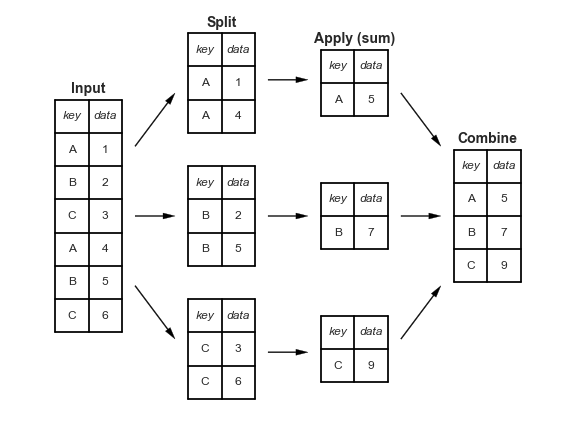

In [125]:
list("ABC") * 2

['A', 'B', 'C', 'A', 'B', 'C']

In [127]:
df = pd.DataFrame({"Key": list("ABC")*2,
                    "value": range(6)})

df

,Key,value
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [128]:
df.groupby("Key")

In [132]:
df.groupby("Key").sum()

,value
Key,
A,3
B,5
C,7


In [133]:
df.groupby("Key").mean()

,value
Key,
A,1.5
B,2.5
C,3.5
